Importing Libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression


Importing Dataset



In [2]:
dataset = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")


Visualizing Dataset


In [3]:
dataset.head(20)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
dataset.shape

(25, 2)

In [5]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


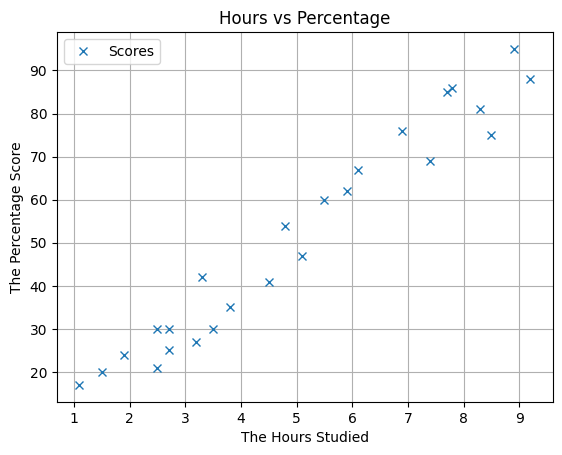

In [7]:
#Hours Vs Percentage of Scores
dataset.plot(x='Hours', y='Scores', style='x')
plt.title('Hours vs Percentage')
plt.xlabel('The Hours Studied')
plt.ylabel('The Percentage Score')
plt.grid()
plt.show()

In [8]:
from sklearn.model_selection import train_test_split


In [9]:
X = dataset["Hours"].values.reshape(-1,1)
y = dataset["Scores"].values.reshape(-1,1)

Splitting of the data


In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


Linear Regression and Training


In [11]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [12]:
line = regressor.coef_ * X + regressor.intercept_

Visualising Training Data


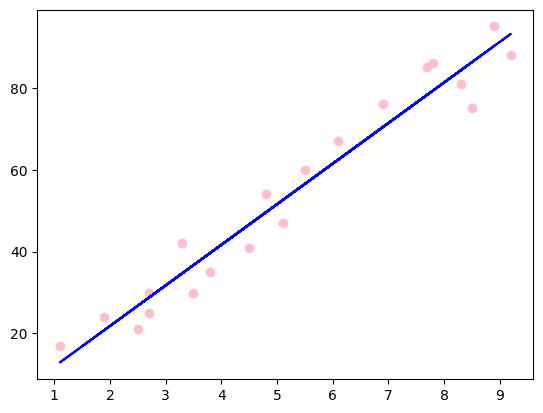

In [13]:
plt.scatter(x_train , y_train , color = "pink")
plt.plot(X , line , color = "b")
plt.show()

In [14]:
y_pred = regressor.predict(x_test)
print(y_pred)

[[16.88414476]
 [33.73226078]
 [75.357018  ]
 [26.79480124]
 [60.49103328]]


Visualization on Test Dataset

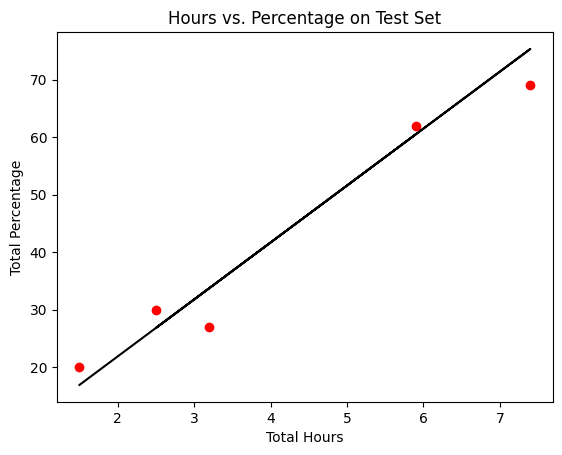

In [15]:
plt.scatter(x_test,y_test , color = "red")
plt.plot(x_test,y_pred , color = "black")
plt.title('Hours vs. Percentage on Test Set')
plt.xlabel('Total Hours')
plt.ylabel('Total Percentage')
plt.show()

In [16]:
dataset_predict = pd.DataFrame({"Hours": x_test.reshape(1,-1)[0] , "Actual Score" : y_test.reshape(1,-1)[0] , "Predicted Score" : y_pred.reshape(1,-1)[0]})


In [17]:
print(dataset_predict)

   Hours  Actual Score  Predicted Score
0    1.5            20        16.884145
1    3.2            27        33.732261
2    7.4            69        75.357018
3    2.5            30        26.794801
4    5.9            62        60.491033


In [18]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982


In [19]:
from sklearn.metrics import r2_score
acc=r2_score(y_test,y_pred)
print('Accuracy:',acc)

Accuracy: 0.9454906892105354


Predictions


In [21]:
s=int(input("enter no of hours "))
dataset = np.array(s)
dataset = dataset.reshape(-1, 1)
pred = regressor.predict(dataset)
print("If the student studies for {} hours per day, then the score is {}.".format(s,pred))

enter no of hours 9
If the student studies for 9 hours per day, then the score is [[91.21406837]].
